In [1]:
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install numpy

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.api.datasets import mnist
from keras.api.models import Sequential
from keras.api.layers import Dense,Conv2D,Flatten,MaxPooling2D,Input

In [3]:
#loadding dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Watching shape
print(y_train.shape)
print(x_train.shape)

(60000,)
(60000, 28, 28)


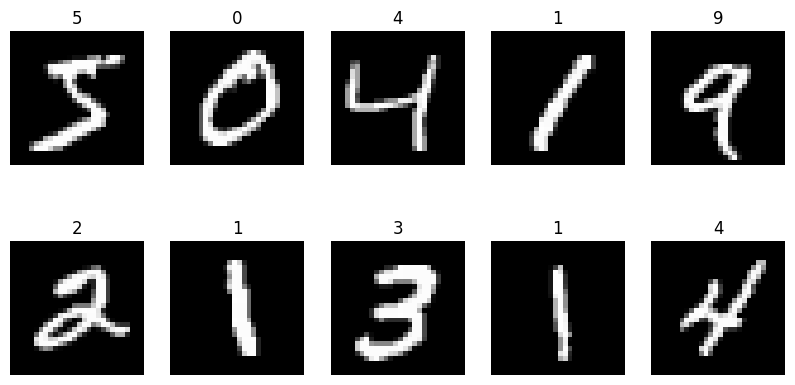

In [5]:
# Initialize the figure and subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through the first 10 images
for i, ax in enumerate(axes.flat):
    # Select the image and label
    image, label = x_train[i], y_train[i]

    # Display the image
    ax.imshow(image, cmap='gray')

    # # Set the title with the class label
    ax.set_title(f"{label}")
    ax.axis('off')

# Display the figure
plt.show()

In [6]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
# Define the CNN model
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [14]:
# Compile the model
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0410 - val_accuracy: 0.9905
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0350 - val_accuracy: 0.9921
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0294 - val_accuracy: 0.9938
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0317 - val_accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0446 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0336 - val_accuracy: 0.9933
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0497 -

In [29]:
# Making prediction on x_test
pred = model.predict(x_test).argmax(axis=1)


313/313 [==============================] - 4s 12ms/step
[7 2 1 ... 4 5 6]


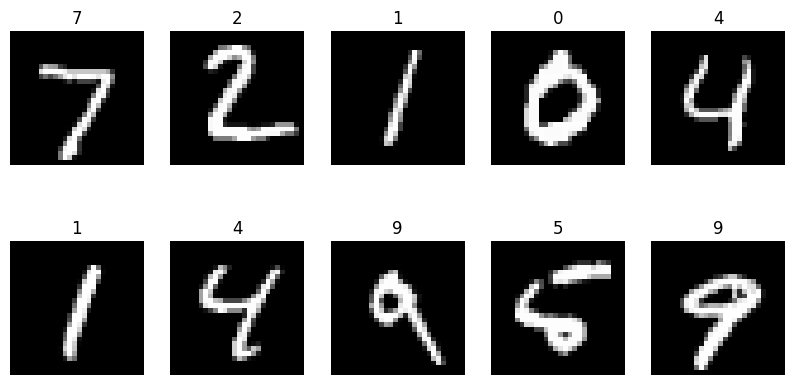

In [30]:

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through the first 10 images
for i, ax in enumerate(axes.flat):
    # Select the image and label
    image, label = x_test[i], pred[i]

    # Display the image
    ax.imshow(image, cmap='gray')

    # # Set the title with the class label
    ax.set_title(f"{label}")
    ax.axis('off')

# Display the figure
plt.show()